In [2]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
sns.set()
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'#cccccc'})
%matplotlib auto
from PIL import Image
import pandas as pd

Using matplotlib backend: Qt5Agg


In [3]:
gB = 1.4400324117846943
gG = 1.5335689920700644
gR = 1.5526529746220272

In [12]:
df = pd.read_excel('cvalsw1.xlsx')

In [13]:
df.head()

,ill,vp,wb,sq,r,g,b
0,1,1,1.0,w,213.0,212,242
1,1,1,NaN,m,254.0,146,182
2,1,1,NaN,c,0.6,172,223
3,1,1,NaN,y,243.0,227,157
4,1,2,NaN,w,215.0,216,246


In [14]:
# # linearize values.
# def linearizeRows(row):
#     row.r = 
# df.transform(linearizeRows, axis=1)

In [15]:
df.r = np.power(df.r.values, gR)
df.g = np.power(df.g.values, gG)
df.b = np.power(df.b.values, gB)

In [16]:
df.head()

,ill,vp,wb,sq,r,g,b
0,1,1,1.0,w,4122.546067,3694.847698,2708.765383
1,1,1,NaN,m,5418.414485,2085.376271,1797.115755
2,1,1,NaN,c,0.452424,2681.248750,2407.881531
3,1,1,NaN,y,5058.464156,4103.252087,1452.669012
4,1,2,NaN,w,4182.803983,3802.295681,2773.473679


In [17]:
# # normalize values.
def normalizeRows(row):
    total = row.r + row.g + row.b
    row.r = row.r / total
    row.g = row.g / total
    row.b = row.b / total
#     print(row.sq)
    if row.sq == 'w':
        row.sq = 'white'
    elif row.sq == 'c':
        row.sq = 'cyan'
    elif row.sq == 'm':
        row.sq = 'magenta'
    else:
        row.sq = 'yellow'
#     print(row.sq)
        
    return row
df = df.transform(normalizeRows, axis=1)

In [18]:
df.head()

,ill,vp,wb,sq,r,g,b
0,1,1,1.0,white,0.391648,0.351016,0.257337
1,1,1,NaN,magenta,0.582568,0.224212,0.193219
2,1,1,NaN,cyan,0.000089,0.526811,0.473100
3,1,1,NaN,yellow,0.476567,0.386575,0.136859
4,1,2,NaN,white,0.388788,0.353420,0.257792


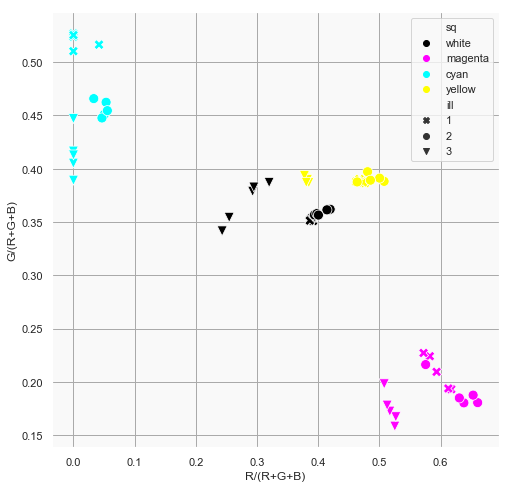

In [20]:
plt.figure(figsize=(8, 8))
plt.rcParams['axes.facecolor'] = '#f9f9f9'
plt.grid(color='#aaaaaa')
palette = {'white':'black', 'magenta':'magenta', 'yellow': 'yellow', 'cyan': 'cyan'}
ax = sns.scatterplot(df.r, df.g,  style=df.ill, hue=df.sq, markers={1:'X', 2:'o', 3:'v'}, palette=palette, s=100)
# plt.xlabel = 'R/(R+G+B)'
ax.set(xlabel='R/(R+G+B)', ylabel='G/(R+G+B)')
plt.show()